In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_model = pd.read_csv("Preprocessed Flight Fare Data.csv")

In [3]:
df_model.head()

,Duration,Total_Stops,Day,Month,Dep_Time_Hrs,Dep_Time_Mins,Arrival_Time_Hrs,Arrival_Time_Mins,Air Asia,Air India,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Price
0,170,0,24,3,22,20,1,10,0,0,...,0,0,1,0,13,29,13,5,1,3897
1,445,2,5,1,5,50,13,15,0,1,...,0,0,0,2,25,1,3,5,1,7662
2,1140,2,6,9,9,25,4,25,0,0,...,0,0,0,3,32,4,5,5,1,13882
3,325,1,5,12,18,5,23,30,0,0,...,0,0,0,2,34,3,13,5,1,6218
4,285,1,3,1,16,50,21,35,0,0,...,0,0,1,0,34,8,13,5,1,13302


## FEATURE SCALING

In [4]:
from sklearn.preprocessing import StandardScaler

scaler_obj = StandardScaler()

scaled_data = scaler_obj.fit_transform(df_model)

In [5]:
print(scaled_data[0] , len(scaled_data[0]) , sep = '\n\n')   # Printing the first scaled datapoint and total number of columns

[-0.93164066 -1.22061921  1.28544609 -0.84839632  1.65416233 -0.23483168
 -1.80032841 -0.88994081 -0.17545815 -0.44265867 -0.13601137  2.05003178
 -0.75058525 -0.02370782 -0.35509693 -0.03490842 -0.2879865  -0.00967641
 -0.21668313 -0.01676161 -0.1923286  -0.85916303 -0.6063049  -0.26401621
 -0.85916303 -0.36653212 -0.26401621 -0.1923286   3.23423877 -1.67424645
  0.13769418  1.3952071   0.40965347  0.06421046  0.00967641 -1.12548281]

36


## SPLITING INTO TRAINING AND TEST DATA

In [6]:
from sklearn.model_selection import train_test_split

x = df_model.drop('Price', axis = 1)
y = df_model['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1 , random_state = 69)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9612, 35)
(1069, 35)
(9612,)
(1069,)


## CREATING FUNCTIONS FOR MODEL EVALUATION

In [8]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error,mean_absolute_error

def evaluation_metrics(y_true,y_pred):
    print("Mean Absolute Error :", mean_absolute_error(y_true,y_pred))
    print("Mean Squared Error :", mean_squared_error(y_true,y_pred))
    print("Root Mean Squared Error :", mean_squared_error(y_true,y_pred) ** 0.5)
    print("R2 Score :", r2_score(y_true,y_pred))

    
def model_accuracy(y_true, y_pred):
    model_error = mean_absolute_percentage_error(y_true,y_pred)
    accuracy = (1-model_error)*100
    print ("Model Accuracy: ",accuracy.round(2),"%")

## BUILDING LINEAR REGRESSION MODEL

In [9]:
from sklearn.linear_model import LinearRegression

l_reg_obj = LinearRegression()
l_reg_obj.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred_l = l_reg_obj.predict(x_test)

## EVALUATING MODEL

In [11]:
evaluation_metrics(y_test,y_pred_l)

Mean Absolute Error : 2021.0988616689742
Mean Squared Error : 8870021.494782865
Root Mean Squared Error : 2978.2581309857724
R2 Score : 0.5579295120701928


In [12]:
model_accuracy(y_test,y_pred_l)

Model Accuracy:  76.04 %


## VISUALIZING MODEL

In [13]:
x_test_visual = x_test.reset_index()

In [14]:
x_test_visual.drop('index', axis= 1, inplace = True)

In [15]:
x_test_visual = x_test_visual.reset_index()

In [16]:
x_test_visual.head()

,index,Duration,Total_Stops,Day,Month,Dep_Time_Hrs,Dep_Time_Mins,Arrival_Time_Hrs,Arrival_Time_Mins,Air Asia,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,0,90,0,6,6,22,45,0,15,0,...,0,1,0,0,1,19,29,13,5,1
1,1,570,1,24,6,13,30,23,0,0,...,0,0,0,0,3,6,6,13,5,1
2,2,665,1,21,5,7,5,18,10,0,...,0,0,0,0,3,20,6,13,5,1
3,3,90,0,24,5,5,45,7,15,0,...,0,1,0,0,1,19,29,13,5,1
4,4,310,1,3,9,6,10,11,20,0,...,0,0,0,0,3,33,6,13,5,1


In [17]:
x_test_index = x_test_visual[['index']]

In [18]:
x_test_index.head()

,index
0,0
1,1
2,2
3,3
4,4


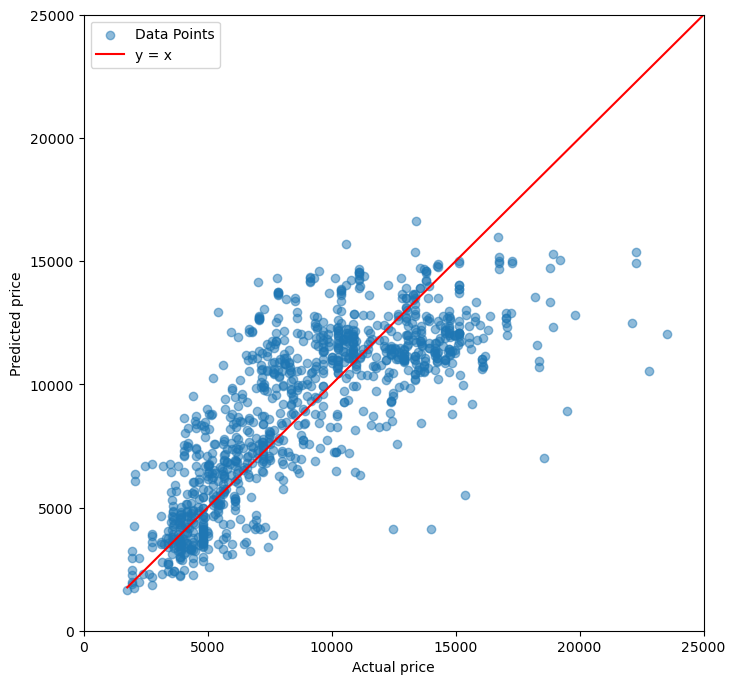

In [19]:
# Plotting Scatter plot


plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_l, alpha=0.5, label='Data Points')  
plt.ylabel("Predicted price")
plt.xlabel("Actual price")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='y = x')
plt.xlim(0,25000)
plt.ylim(0,25000)
plt.legend()
plt.show()

## CREATING RANDOM FOREST REGRESSOR MODEL

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor_obj = RandomForestRegressor(n_estimators = 150,min_samples_split = 100, max_depth = 50)
rf_regressor_obj.fit(x_train,y_train)

RandomForestRegressor(max_depth=50, min_samples_split=100, n_estimators=150)

In [21]:
y_pred_rf = rf_regressor_obj.predict(x_test)

In [22]:
evaluation_metrics(y_test,y_pred_rf)

Mean Absolute Error : 1301.4189219802877
Mean Squared Error : 4296267.123593116
Root Mean Squared Error : 2072.7438634797877
R2 Score : 0.7858795601881355


In [23]:
model_accuracy(y_test,y_pred_rf)

Model Accuracy:  85.4 %


## VISUALIZING MODEL

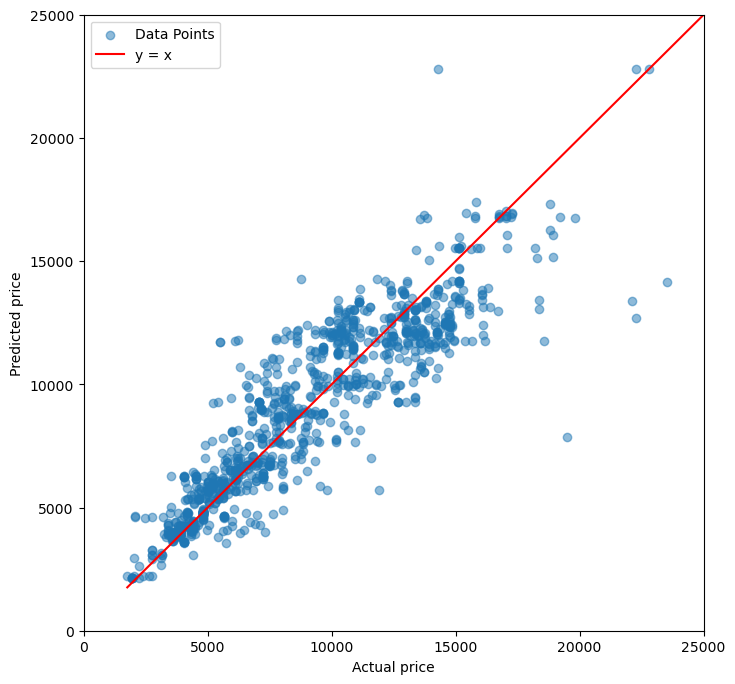

In [24]:
# Plotting Scatter Plot

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Data Points')  
plt.ylabel("Predicted price")
plt.xlabel("Actual price")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='y = x')
plt.xlim(0,25000)
plt.ylim(0,25000)
plt.legend()
plt.show()

## IMPROVING MODEL BY TUNING HYPER PARAMETERS

In [25]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


param_dist = {'n_estimators': randint(0,1000),'min_samples_split': randint(1,40),'max_depth': randint(1,100)}

rf_improved = RandomForestRegressor()

rand_search = RandomizedSearchCV(rf_improved, param_distributions = param_dist,n_iter=5,cv=5)
rand_search.fit(x_train, y_train) #Fitting the data

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B9777E9590>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B977AD3790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B977920A90>})

In [26]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_) # Printing the Best Parameters

Best hyperparameters: {'max_depth': 88, 'min_samples_split': 13, 'n_estimators': 640}


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor_obj = RandomForestRegressor(n_estimators = 282,min_samples_split = 15, max_depth = 28)
rf_regressor_obj.fit(x_train,y_train)

RandomForestRegressor(max_depth=28, min_samples_split=15, n_estimators=282)

In [28]:
y_pred_rf_improved = rf_regressor_obj.predict(x_test)

In [29]:
evaluation_metrics(y_test,y_pred_rf_improved)

Mean Absolute Error : 1081.132344077912
Mean Squared Error : 3232758.2825592053
Root Mean Squared Error : 1797.987286539926
R2 Score : 0.8388834759678271


In [30]:
model_accuracy(y_test,y_pred_rf_improved)

Model Accuracy:  88.01 %


## VISUALIZING MODEL

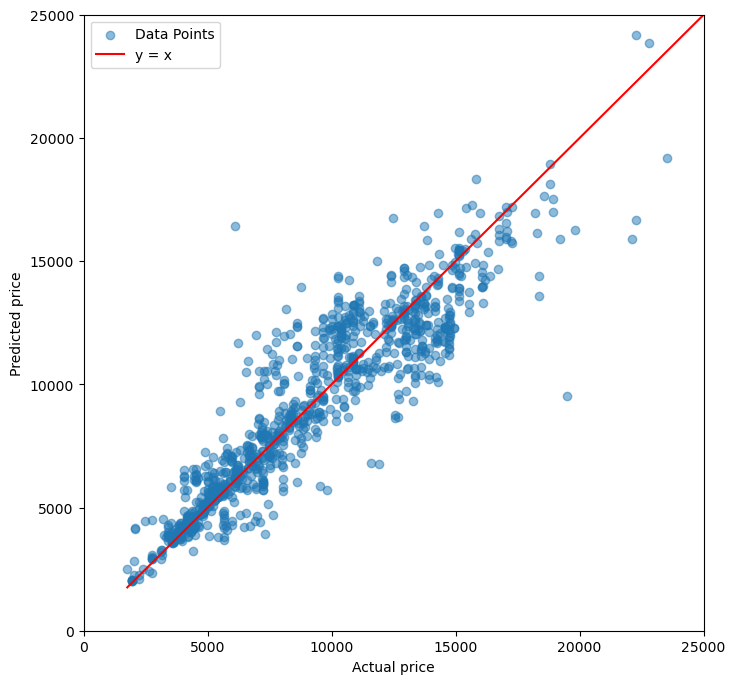

In [31]:
# Plotting Scatter Plot

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_rf_improved, alpha=0.5, label='Data Points')  
plt.ylabel("Predicted price")
plt.xlabel("Actual price")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='y = x')
plt.xlim(0,25000)
plt.ylim(0,25000)
plt.legend()
plt.show()